# Problem Statements:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import itertools

In [13]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [15]:
df.dropna(inplace = True)
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df["Amount"].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [18]:
genuine_trans = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])

fraud_percent = (fraud / (fraud + genuine_trans)) * 100

print("Number of Genuine transactions: ", genuine_trans)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  11615
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


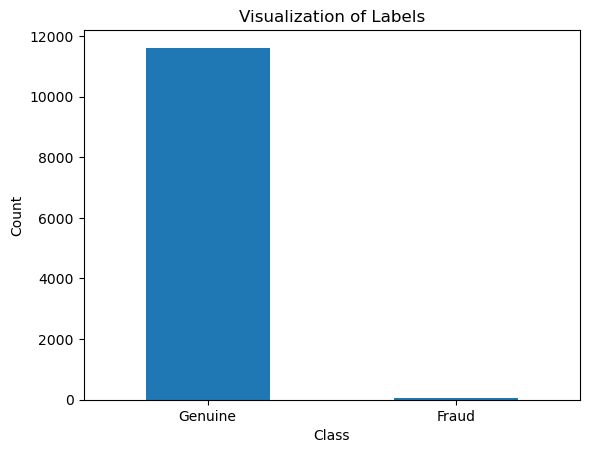

In [19]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = df["Class"]
X = df.drop(["Class"], axis= 1)


In [22]:
from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size= 0.3, random_state = 10)

x_train.shape, x_test.shape

((8164, 29), (3500, 29))

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
dt = DecisionTreeClassifier()

# Random Forest
rfr = RandomForestClassifier(n_estimators= 100)

In [25]:
dt.fit(x_train, y_train)
predictions_dt = dt.predict(x_test)
dt_score = dt.score(x_test, y_test) * 100

rfr.fit(x_train, y_train)
predictions_rf = rfr.predict(x_test)
rfr_score = rfr.score(x_test, y_test) * 100

print("Random Forest Score: ", rfr_score)
print("Decision Tree Score: ", dt_score)

Random Forest Score:  99.91428571428571
Decision Tree Score:  99.85714285714286


In [26]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

def metrics(actuals, predictions):
    
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [29]:
confusion_matrix_dt = confusion_matrix(y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3485    2]
 [   3   10]]


In [30]:
metrics(y_test, predictions_dt)

Accuracy: 0.99857
Precision: 0.83333
Recall: 0.76923
F1-score: 0.80000


In [31]:
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[3486    1]
 [   2   11]]


In [32]:
metrics(y_test, predictions_rf)

Accuracy: 0.99914
Precision: 0.91667
Recall: 0.84615
F1-score: 0.88000
